In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("./images/01.jpg")

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(1200, 800, 3)

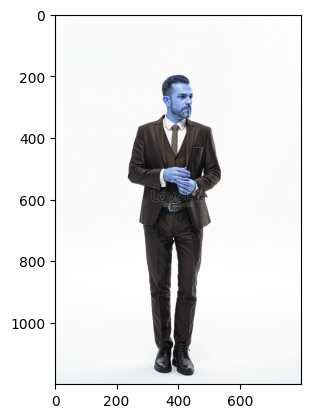

In [5]:
plt.imshow(image)

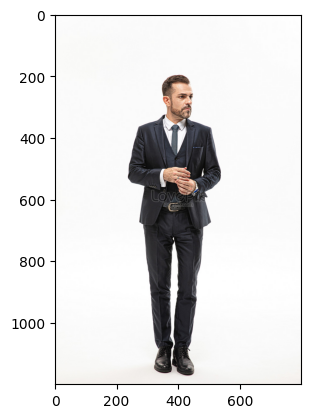

In [6]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [7]:
"""
1. Splitting image channels
"""
r, g, b = cv2.split(new_image)
# print('r', r.shape)
# print('g', g.shape)
# print('b', b.shape)

new_image = cv2.merge((r, g, b))

In [8]:
"""
Resize of images
"""

s = 10
w = int(new_image.shape[1] * s / 100)
h = int(new_image.shape[0] * s / 100)
dim = (w, h)
re_size = cv2.resize(new_image, dim, interpolation=cv2.INTER_AREA)
re_size.shape

(120, 80, 3)

In [9]:
"""
3. Rotate operation
"""

(h, w) = new_image.shape[:2]

c = (w/2, h/2)

angle = 90

m = cv2.getRotationMatrix2D(c, angle, 1.0)
rotate_90 = cv2.warpAffine(new_image, m, (h, w))

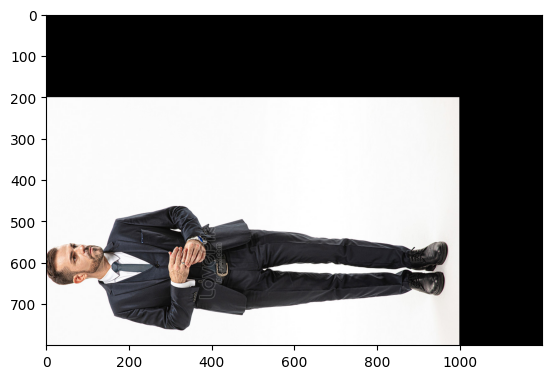

In [10]:
plt.imshow(rotate_90)

---

In [11]:
yolo = cv2.dnn.readNet("./yolov3/yolov3_320.weights", "./yolov3/yolov3_320.cfg")

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/dnn/src/darknet/darknet_importer.cpp:217: error: (-212:Parsing error) Failed to parse NetParameter file: ./yolov3/yolov3_320.weights in function 'readNetFromDarknet'


In [ ]:
classes = []

with open("./yolov3/coco.names", "r") as f:
    classes = f.read().splitlines()

In [ ]:
len(classes)

80

In [ ]:
img = cv2.imread("./images/01.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), (0,0,0), swapRB=True, crop=False)

width = img.shape[1]
height = img.shape[0]

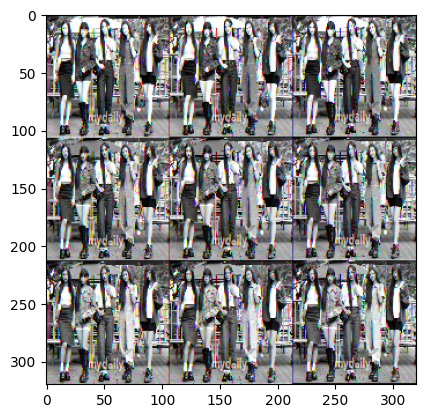

In [ ]:
# to print Img

i = blob[0].reshape(320, 320, 3)
plt.imshow(i)

In [ ]:
yolo.setInput(blob)

In [ ]:
output_layers_names = yolo.getUnconnectedOutLayersNames()
layer_output = yolo.forward(output_layers_names)

In [ ]:
boxes = []
confidences = []
class_ids = []

for output in layer_output:
    for detection in output:
        score = detection[5:]            # output은 0~18인데 앞의 4개는 제외하고 봄
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[0] * height)
            w = int(detection[0] * width)
            h = int(detection[0] * height)

            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [ ]:
len(boxes)

25

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [ ]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 1) # type: ignore
    cv2.putText(img, label + " " + confi, (x, y + 20), font, 2, (255,255,255), 1)

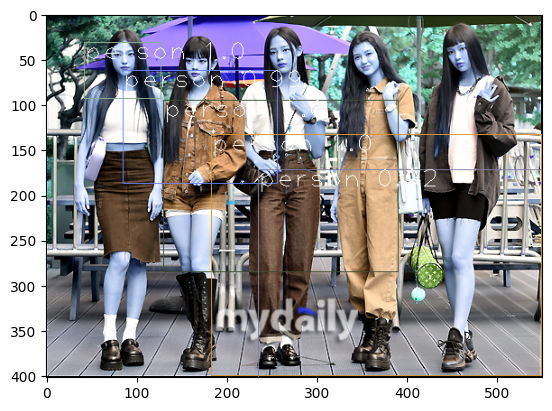

In [ ]:
plt.imshow(img)